<a href="https://www.kaggle.com/code/serdargundogdu/football-talent-hunt-classification-with-ml?scriptVersionId=114696067" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# TALENT HUNT CLASSIFICATION WITH MACHINE LEARNING

# Problem Definition

The Goal is prediction of the football players who are being watched by scouts, in order to explore which class (average, highlighted) players are, based on given scores of features.

Scout: The Person who is observing player's whose future looks bright, and determining current talents and potentials of players, as a watcher or a talent hunter.

# Dataset Story

The Dataset consists of scored features and their scores of players who are evaluated on observed features in matches by scouts.

"scoutium_attributes.csv"

8 variables - 10.730 Observation - 527 Kb

* task_response_id : The evaluation set of a scout for all players of the team in a match.
* match_id : Regarding match id.
* evaluator_id : Evaluator scout id.
* player_id : Regarding player id.
* position_id : Regarding player position in the match.
    1 : Goalkeeper
    2 : Stopper
    3 : Right Back
    4 : Left Back
    5 : Defensive Midfielder
    6 : Centeral Midfielder
    7 : Right Wing
    8 : Left Wing
    9 : Offensive Midfielder
    10 : Center Forward
* analysis_id : The evaluation set of a scout for the player in a match
* attribute_id : Evaluated players each feature id
* attribute_value : Scout evaluating Score of a player for a feature

"scoutium_potential_labels.csv"

5 variables - 322 Observation - 12 Kb

* task_response_id : The evaluation set of a scout for all players of the team in a match.
* match_id : Regarding match id.
* evaluator_id : Evaluator scout id.
* player_id : Regarding player id.
* potential_label : The final result label of scout for a player in a match. (Target Variable)

# TASK 1. Reading Files

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [2]:
df_attrs = pd.read_csv("/kaggle/input/scoutiumattributes/scoutium_attributes.csv", sep=";")
df_labels = pd.read_csv("/kaggle/input/scoutiumpotentiallabels/scoutium_potential_labels.csv", sep=";")

In [3]:
df_attrs.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value
0,4915,62935,177676,1361061,2,12818495,4322,56.0
1,4915,62935,177676,1361061,2,12818495,4323,56.0
2,4915,62935,177676,1361061,2,12818495,4324,67.0
3,4915,62935,177676,1361061,2,12818495,4325,56.0
4,4915,62935,177676,1361061,2,12818495,4326,45.0


In [4]:
df_attrs.shape

(10730, 8)

In [5]:
df_attrs.isnull().sum()

task_response_id    0
match_id            0
evaluator_id        0
player_id           0
position_id         0
analysis_id         0
attribute_id        0
attribute_value     0
dtype: int64

In [6]:
df_labels.head()

,task_response_id,match_id,evaluator_id,player_id,potential_label
0,4915,62935,177676,1361061,average
1,4915,62935,177676,1361626,highlighted
2,4915,62935,177676,1361858,average
3,4915,62935,177676,1362220,highlighted
4,4915,62935,177676,1364951,highlighted


In [7]:
df_labels.shape

(322, 5)

In [8]:
df_labels.isnull().sum()

task_response_id    0
match_id            0
evaluator_id        0
player_id           0
potential_label     0
dtype: int64

# TASK 2. Merging These Two Files by Using `merge` Function

In [9]:
df = df_attrs.merge(df_labels, how="outer", on=["task_response_id",
                                                "match_id",
                                                "evaluator_id",
                                                "player_id"])

In [10]:
df.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.0,average
1,4915,62935,177676,1361061,2,12818495,4323,56.0,average
2,4915,62935,177676,1361061,2,12818495,4324,67.0,average
3,4915,62935,177676,1361061,2,12818495,4325,56.0,average
4,4915,62935,177676,1361061,2,12818495,4326,45.0,average


In [11]:
df.shape

(10730, 9)

In [12]:
df.isnull().sum()

task_response_id    0
match_id            0
evaluator_id        0
player_id           0
position_id         0
analysis_id         0
attribute_id        0
attribute_value     0
potential_label     0
dtype: int64

# TASK 3. Dropping (`1`) Goalkeeper Class in `position_id` From Dataset

In [13]:
df.loc[df["position_id"]==1].head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
238,4915,62935,177676,1369060,1,12818481,4322,45.0,average
239,4915,62935,177676,1369060,1,12818481,4323,34.0,average
240,4915,62935,177676,1369060,1,12818481,4324,45.0,average
241,4915,62935,177676,1369060,1,12818481,4325,56.0,average
242,4915,62935,177676,1369060,1,12818481,4326,56.0,average


In [14]:
df.drop(df.loc[df["position_id"]==1].index, inplace=True)

In [15]:
df.loc[df["position_id"]==1].head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label


In [16]:
df.shape

(10030, 9)

# TASK 4. Dropping (`below_average`) Class in `potential_label` From Dataset

`below_average` class ratio is 1 % of all values.

In [17]:
df[df["potential_label"] == "below_average"].head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
467,4919,62935,186987,1369361,3,12818553,4322,23.0,below_average
468,4919,62935,186987,1369361,3,12818553,4323,23.0,below_average
469,4919,62935,186987,1369361,3,12818553,4324,23.0,below_average
470,4919,62935,186987,1369361,3,12818553,4325,23.0,below_average
471,4919,62935,186987,1369361,3,12818553,4326,23.0,below_average


In [18]:
df.drop(df.loc[df["potential_label"]=="below_average"].index, inplace=True)

In [19]:
df[df["potential_label"] == "below_average"].head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label


In [20]:
df.shape

(9894, 9)

# TASK 5. Creating A Table By Using `pivot_table` From Created Dataset

Manipulating of pivot data as each row has a unique player.

# TASK 5.1. Creating Pivot Table to Index as `player_id`, `position_id`, `potential_label` and Columns as `attribute_id` and Player Score Values Evaluated by Scouts In Cells

In [21]:
pd.pivot_table(df, 
               values=["attribute_value"], 
               index=["player_id","position_id","potential_label"],
               columns=["attribute_id"],
               aggfunc={"attribute_value":np.mean})

attribute_value                                                                                                                                                                                                      
attribute_id                                     4322  4323  4324  4325  4326  4327  4328  4329  4330  4332  4333  4335  4338  4339  4340  4341  4342  4343  4344  4345  4348  4349  4350  4351  4352  4353  4354  4355  4356  4357  4407  4408  4423  4426
player_id position_id potential_label                                                                                                                                                                                                                      
1355710   7           average                    50.5  50.5  34.0  50.5  45.0  45.0  45.0  45.0  50.5  56.0  39.5  34.0  39.5  39.5  45.0  45.0  50.5  28.5  23.0  39.5  28.5  28.5  45.0  50.5  56.0  34.0  39.5  50.5  34.0  34.0  56.0  34.0  34.0  56.0
1356362   9           average                    67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  56.0  67.0  67.0  56.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  67.0  67.0  56.0  78.0
1356375   3           average                    67.0  67.0  67.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  78.0  56.0  67.0  67.0  67.0  67.0  67.0  56.0  56.0  67.0  67.0  56.0  56.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  67.0  67.0  56.0  78.0
          4           average                    67.0  78.0  67.0  67.0  67.0  78.0  78.0  78.0  56.0  67.0  67.0  67.0  78.0  78.0  56.0  67.0  67.0  45.0  45.0  56.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  56.0  67.0  56.0  67.0  45.0  56.0
1356411   9           average                    67.0  67.0  78.0  78.0  67.0  67.0  67.0  67.0  89.0  78.0  67.0  67.0  67.0  56.0  56.0  67.0  78.0  56.0  56.0  67.0  56.0  67.0  56.0  67.0  67.0  56.0  67.0  67.0  56.0  67.0  89.0  56.0  67.0  78.0
...                                               ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
1907347   5           average                    67.0  78.0  78.0  56.0  78.0  67.0  78.0  67.0  56.0  78.0  78.0  56.0  67.0  67.0  78.0  56.0  67.0  56.0  56.0  67.0  78.0  89.0  67.0  78.0  67.0  67.0  67.0  67.0  56.0  67.0  78.0  78.0  78.0  56.0
          6           average                    67.0  67.0  67.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  78.0  56.0  67.0  67.0  67.0  67.0  78.0  67.0  56.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  67.0  67.0  67.0  78.0
1909532   10          average                    56.0  45.0  45.0  45.0  56.0  56.0  56.0  56.0  23.0  23.0  34.0  45.0  56.0  34.0  23.0  45.0  45.0  23.0  23.0  34.0  23.0  23.0  34.0  23.0  45.0  45.0  56.0  34.0  34.0  56.0  34.0  34.0  34.0  23.0
1909724   2           highlighted                78.0  78.0  78.0  78.0  78.0  78.0  78.0  78.0  67.0  67.0  78.0  78.0  78.0  67.0  78.0  67.0  78.0  56.0  56.0  78.0  78.0  67.0  78.0  78.0  78.0  78.0  78.0  67.0  67.0  67.0  78.0  78.0  67.0  78.0
1909728   7           highlighted                78.0  67.0  67.0  78.0  67.0  67.0  67.0  78.0  67.0  67.0  78.0  67.0  78.0  67.0  67.0  78.0  78.0  67.0  56.0  78.0  67.0  56.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  78.0  67.0  67.0  78.0

[271 rows x 34 columns]

# TASK 5.2. Assigning Indexes As Variables By Using `reset_index` Function and Converting `attribute_id` Column Names into String

In [22]:
df_table = pd.pivot_table(df, 
               values=["attribute_value"], 
               index=["player_id","position_id","potential_label"],
               columns=["attribute_id"],
               aggfunc={"attribute_value":np.mean}).reset_index()
df_table

player_id position_id potential_label attribute_value                                                                                                                                                                                                      
attribute_id                                                  4322  4323  4324  4325  4326  4327  4328  4329  4330  4332  4333  4335  4338  4339  4340  4341  4342  4343  4344  4345  4348  4349  4350  4351  4352  4353  4354  4355  4356  4357  4407  4408  4423  4426
0              1355710           7         average            50.5  50.5  34.0  50.5  45.0  45.0  45.0  45.0  50.5  56.0  39.5  34.0  39.5  39.5  45.0  45.0  50.5  28.5  23.0  39.5  28.5  28.5  45.0  50.5  56.0  34.0  39.5  50.5  34.0  34.0  56.0  34.0  34.0  56.0
1              1356362           9         average            67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  56.0  67.0  67.0  56.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  67.0  67.0  56.0  78.0
2              1356375           3         average            67.0  67.0  67.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  78.0  56.0  67.0  67.0  67.0  67.0  67.0  56.0  56.0  67.0  67.0  56.0  56.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  67.0  67.0  56.0  78.0
3              1356375           4         average            67.0  78.0  67.0  67.0  67.0  78.0  78.0  78.0  56.0  67.0  67.0  67.0  78.0  78.0  56.0  67.0  67.0  45.0  45.0  56.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  56.0  67.0  56.0  67.0  45.0  56.0
4              1356411           9         average            67.0  67.0  78.0  78.0  67.0  67.0  67.0  67.0  89.0  78.0  67.0  67.0  67.0  56.0  56.0  67.0  78.0  56.0  56.0  67.0  56.0  67.0  56.0  67.0  67.0  56.0  67.0  67.0  56.0  67.0  89.0  56.0  67.0  78.0
..                 ...         ...             ...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
266            1907347           5         average            67.0  78.0  78.0  56.0  78.0  67.0  78.0  67.0  56.0  78.0  78.0  56.0  67.0  67.0  78.0  56.0  67.0  56.0  56.0  67.0  78.0  89.0  67.0  78.0  67.0  67.0  67.0  67.0  56.0  67.0  78.0  78.0  78.0  56.0
267            1907347           6         average            67.0  67.0  67.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  78.0  56.0  67.0  67.0  67.0  67.0  78.0  67.0  56.0  67.0  67.0  67.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  67.0  67.0  67.0  78.0
268            1909532          10         average            56.0  45.0  45.0  45.0  56.0  56.0  56.0  56.0  23.0  23.0  34.0  45.0  56.0  34.0  23.0  45.0  45.0  23.0  23.0  34.0  23.0  23.0  34.0  23.0  45.0  45.0  56.0  34.0  34.0  56.0  34.0  34.0  34.0  23.0
269            1909724           2     highlighted            78.0  78.0  78.0  78.0  78.0  78.0  78.0  78.0  67.0  67.0  78.0  78.0  78.0  67.0  78.0  67.0  78.0  56.0  56.0  78.0  78.0  67.0  78.0  78.0  78.0  78.0  78.0  67.0  67.0  67.0  78.0  78.0  67.0  78.0
270            1909728           7     highlighted            78.0  67.0  67.0  78.0  67.0  67.0  67.0  78.0  67.0  67.0  78.0  67.0  78.0  67.0  67.0  78.0  78.0  67.0  56.0  78.0  67.0  56.0  67.0  67.0  67.0  67.0  78.0  67.0  67.0  67.0  78.0  67.0  67.0  78.0

[271 rows x 37 columns]

In [23]:
for col in df_table.columns:
    print(col[0], col[1])

player_id 
position_id 
potential_label 
attribute_value 4322
attribute_value 4323
attribute_value 4324
attribute_value 4325
attribute_value 4326
attribute_value 4327
attribute_value 4328
attribute_value 4329
attribute_value 4330
attribute_value 4332
attribute_value 4333
attribute_value 4335
attribute_value 4338
attribute_value 4339
attribute_value 4340
attribute_value 4341
attribute_value 4342
attribute_value 4343
attribute_value 4344
attribute_value 4345
attribute_value 4348
attribute_value 4349
attribute_value 4350
attribute_value 4351
attribute_value 4352
attribute_value 4353
attribute_value 4354
attribute_value 4355
attribute_value 4356
attribute_value 4357
attribute_value 4407
attribute_value 4408
attribute_value 4423
attribute_value 4426


In [24]:
new_cols=[]
for col in df_table.columns:
    if col[0] !="attribute_value":
        new_cols.append(col[0])
    else:
        new_cols.append(str(col[1]))

In [25]:
for new_col in new_cols:
    print(type(new_col),new_col)

<class 'str'> player_id
<class 'str'> position_id
<class 'str'> potential_label
<class 'str'> 4322
<class 'str'> 4323
<class 'str'> 4324
<class 'str'> 4325
<class 'str'> 4326
<class 'str'> 4327
<class 'str'> 4328
<class 'str'> 4329
<class 'str'> 4330
<class 'str'> 4332
<class 'str'> 4333
<class 'str'> 4335
<class 'str'> 4338
<class 'str'> 4339
<class 'str'> 4340
<class 'str'> 4341
<class 'str'> 4342
<class 'str'> 4343
<class 'str'> 4344
<class 'str'> 4345
<class 'str'> 4348
<class 'str'> 4349
<class 'str'> 4350
<class 'str'> 4351
<class 'str'> 4352
<class 'str'> 4353
<class 'str'> 4354
<class 'str'> 4355
<class 'str'> 4356
<class 'str'> 4357
<class 'str'> 4407
<class 'str'> 4408
<class 'str'> 4423
<class 'str'> 4426


In [26]:
df_table.columns=new_cols
df_table

,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,average,50.5,50.5,34.0,50.5,45.0,45.0,45.0,45.0,50.5,56.0,39.5,34.0,39.5,39.5,45.0,45.0,50.5,28.5,23.0,39.5,28.5,28.5,45.0,50.5,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,56.0,67.0,67.0,56.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,78.0,56.0,67.0,67.0,67.0,67.0,67.0,56.0,56.0,67.0,67.0,56.0,56.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,average,67.0,78.0,67.0,67.0,67.0,78.0,78.0,78.0,56.0,67.0,67.0,67.0,78.0,78.0,56.0,67.0,67.0,45.0,45.0,56.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,average,67.0,67.0,78.0,78.0,67.0,67.0,67.0,67.0,89.0,78.0,67.0,67.0,67.0,56.0,56.0,67.0,78.0,56.0,56.0,67.0,56.0,67.0,56.0,67.0,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1907347,5,average,67.0,78.0,78.0,56.0,78.0,67.0,78.0,67.0,56.0,78.0,78.0,56.0,67.0,67.0,78.0,56.0,67.0,56.0,56.0,67.0,78.0,89.0,67.0,78.0,67.0,67.0,67.0,67.0,56.0,67.0,78.0,78.0,78.0,56.0
267,1907347,6,average,67.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,78.0,56.0,67.0,67.0,67.0,67.0,78.0,67.0,56.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0
268,1909532,10,average,56.0,45.0,45.0,45.0,56.0,56.0,56.0,56.0,23.0,23.0,34.0,45.0,56.0,34.0,23.0,45.0,45.0,23.0,23.0,34.0,23.0,23.0,34.0,23.0,45.0,45.0,56.0,34.0,34.0,56.0,34.0,34.0,34.0,23.0
269,1909724,2,highlighted,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,67.0,67.0,78.0,78.0,78.0,67.0,78.0,67.0,78.0,56.0,56.0,78.0,78.0,67.0,78.0,78.0,78.0,78.0,78.0,67.0,67.0,67.0,78.0,78.0,67.0,78.0


# TASK 6. Transforming `potential_label` Class (average, highlighted) to Numerical Values By Using Label Encoder Function

In [27]:
df_table["potential_label"].value_counts()

average        215
highlighted     56
Name: potential_label, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [29]:
for col in ["potential_label"]:
    label_encoder(df_table, col)

In [30]:
df_table.head()

,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,50.5,50.5,34.0,50.5,45.0,45.0,45.0,45.0,50.5,56.0,39.5,34.0,39.5,39.5,45.0,45.0,50.5,28.5,23.0,39.5,28.5,28.5,45.0,50.5,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,56.0,67.0,67.0,56.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,78.0,56.0,67.0,67.0,67.0,67.0,67.0,56.0,56.0,67.0,67.0,56.0,56.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,0,67.0,78.0,67.0,67.0,67.0,78.0,78.0,78.0,56.0,67.0,67.0,67.0,78.0,78.0,56.0,67.0,67.0,45.0,45.0,56.0,67.0,67.0,67.0,67.0,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,67.0,89.0,78.0,67.0,67.0,67.0,56.0,56.0,67.0,78.0,56.0,56.0,67.0,56.0,67.0,56.0,67.0,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0


In [31]:
df_table["potential_label"].value_counts()

0    215
1     56
Name: potential_label, dtype: int64

# TASK 7. Assigning Numerical Columns As "num_cols" In A List 

In [32]:
df_table.dtypes

player_id            int64
position_id          int64
potential_label      int64
4322               float64
4323               float64
4324               float64
4325               float64
4326               float64
4327               float64
4328               float64
4329               float64
4330               float64
4332               float64
4333               float64
4335               float64
4338               float64
4339               float64
4340               float64
4341               float64
4342               float64
4343               float64
4344               float64
4345               float64
4348               float64
4349               float64
4350               float64
4351               float64
4352               float64
4353               float64
4354               float64
4355               float64
4356               float64
4357               float64
4407               float64
4408               float64
4423               float64
4426               float64
d

In [33]:
num_cols = [col for col in df_table.columns if "_id" not in col]

In [34]:
num_cols

['potential_label',
 '4322',
 '4323',
 '4324',
 '4325',
 '4326',
 '4327',
 '4328',
 '4329',
 '4330',
 '4332',
 '4333',
 '4335',
 '4338',
 '4339',
 '4340',
 '4341',
 '4342',
 '4343',
 '4344',
 '4345',
 '4348',
 '4349',
 '4350',
 '4351',
 '4352',
 '4353',
 '4354',
 '4355',
 '4356',
 '4357',
 '4407',
 '4408',
 '4423',
 '4426']

# TASK 8. Applying StandardScaler To Scale Created `num_cols` Values

In [35]:
from sklearn.preprocessing import StandardScaler
y = df_table[["potential_label"]]
X = df_table[num_cols].drop(["potential_label"], axis=1)
X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [36]:
X.head()

,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,-0.542606,-0.559398,-1.404764,-0.437916,-0.766602,-0.794802,-0.907351,-0.791605,-0.446324,-0.122619,-1.223858,-1.035633,-1.126240,-1.009285,-0.541797,-0.690375,-0.535091,-1.067288,-1.205671,-1.004927,-1.313773,-1.041775,-0.693269,-0.435633,0.012848,-1.281899,-1.132245,-0.494569,-1.234869,-1.519578,-0.142650,-1.487256,-0.955381,-0.252741
1,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,0.404075,0.727985,0.691171,0.459154,0.996474,0.631888,0.840464,0.911936,0.799406,0.588047,1.229965,0.749536,0.742305,0.878802,0.669953,0.847750,0.716763,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611
2,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,1.001915,0.727985,0.691171,1.132359,0.319105,0.631888,0.840464,0.911936,0.799406,0.588047,0.573607,0.749536,0.742305,0.878802,0.669953,0.077240,0.716763,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611
3,0.595327,1.307560,0.678677,0.682837,0.722639,1.481795,1.355461,1.001915,-0.054888,0.691171,0.459154,0.996474,1.335139,1.580363,0.185069,0.799406,0.588047,-0.082751,0.097800,0.043412,0.878802,1.354645,0.847750,0.716763,1.560314,0.813645,0.428479,0.631718,0.198319,0.768231,-0.142650,0.668713,-0.275832,-0.252741
4,0.595327,0.560776,1.373158,1.430006,0.722639,0.722929,0.601190,0.404075,2.293730,1.504961,0.459154,0.996474,0.631888,0.100564,0.185069,0.799406,1.336806,0.573607,0.749536,0.742305,0.252352,1.354645,0.077240,0.716763,0.786581,0.115130,0.428479,0.631718,0.198319,0.768231,1.874292,-0.049944,1.083267,1.041611


In [37]:
X.shape

(271, 34)

In [38]:
y.head()

,potential_label
0,0
1,0
2,0
3,0
4,0


In [39]:
y.shape

(271, 1)

# SUPERVISED LEARNING APPROACH MODELS

# TASK 9. Creating A Machine Learning Model To Predict Players Potential Labels By Using Available Dataset With Minimum Error. (Print Roc_auc, f1, precisioni recall, accuracy metrics)

In [40]:
import warnings

warnings.catch_warnings()
warnings.simplefilter("ignore")
    
from sklearn.model_selection import cross_validate    
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

def base_models(X, y, rs, scoring):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression(random_state=rs)),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC(random_state=rs)),
                   ("CART", DecisionTreeClassifier(random_state=rs)),
                   ("RF", RandomForestClassifier(random_state=rs)),
                   ('Adaboost', AdaBoostClassifier(random_state=rs)),
                   ('GBM', GradientBoostingClassifier(random_state=rs)),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=rs)),
                   ('LightGBM', LGBMClassifier(random_state=rs)),
                   ('CatBoost', CatBoostClassifier(verbose=False,random_state=rs))]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

scores = ["roc_auc", "f1", "precision", "recall", "accuracy"]

for i in scores:
    base_models(X, y, 1, i)

Base Models....
roc_auc: 0.8167 (LR) 
roc_auc: 0.7719 (KNN) 
roc_auc: 0.8618 (SVC) 
roc_auc: 0.722 (CART) 
roc_auc: 0.893 (RF) 
roc_auc: 0.7753 (Adaboost) 
roc_auc: 0.853 (GBM) 
roc_auc: 0.8508 (XGBoost) 
roc_auc: 0.8774 (LightGBM) 
roc_auc: 0.896 (CatBoost) 
Base Models....
f1: 0.5728 (LR) 
f1: 0.4784 (KNN) 
f1: 0.3998 (SVC) 
f1: 0.5546 (CART) 
f1: 0.5632 (RF) 
f1: 0.5571 (Adaboost) 
f1: 0.5852 (GBM) 
f1: 0.5853 (XGBoost) 
f1: 0.5824 (LightGBM) 
f1: 0.6395 (CatBoost) 
Base Models....
precision: 0.7492 (LR) 
precision: 0.9583 (KNN) 
precision: 1.0 (SVC) 
precision: 0.5629 (CART) 
precision: 0.8722 (RF) 
precision: 0.5951 (Adaboost) 
precision: 0.7188 (GBM) 
precision: 0.6866 (XGBoost) 
precision: 0.6996 (LightGBM) 
precision: 0.9091 (CatBoost) 
Base Models....
recall: 0.4815 (LR) 
recall: 0.3226 (KNN) 
recall: 0.2505 (SVC) 
recall: 0.5877 (CART) 
recall: 0.4279 (RF) 
recall: 0.5517 (Adaboost) 
recall: 0.5 (GBM) 
recall: 0.5166 (XGBoost) 
recall: 0.499 (LightGBM) 
recall: 0.499 (CatBoos

# TASK 10. Graphing Ordered Variables Importance Level By Using feature_importance Function.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

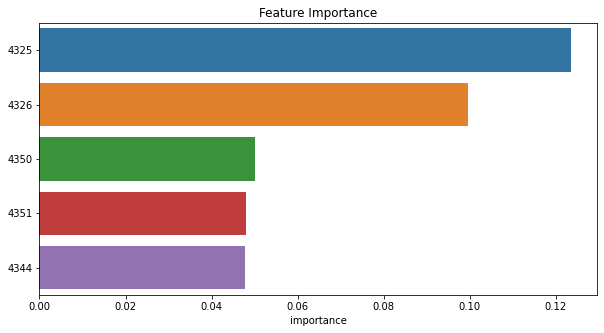

In [42]:
import matplotlib.pyplot as plt
def feature_importance(model, X_train, y_train):
    model.fit(X_train, y_train)
    feature_importance = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["importance"])
    feature_importance.sort_values(by="importance", ascending=False, inplace=True)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importance.importance[:5], y=feature_importance.index[:5])
    plt.title("Feature Importance")
    plt.show()

feature_importance(RandomForestClassifier(), X_train, y_train)

# UNSUPERVISED LEARNING APPROACH MODELS

# TASK 9. Creating A Machine Learning Model To Predict Players Potential Labels By Using Available Dataset With Minimum Error. (Print Roc_auc, f1, precisioni recall, accuracy metrics)

In [43]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=4, random_state=17).fit(X)

In [44]:
kmeans_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [45]:
print(kmeans_model.n_clusters)
print(kmeans_model.cluster_centers_)
print(kmeans_model.labels_)
print(kmeans_model.inertia_)

4
[[ 0.13616115  0.14808034  0.40454033  0.38790203  0.31113837  0.18373516
   0.30345147  0.19955095  0.52196569  0.39135358  0.17569919  0.37258133
   0.20623601  0.06162235 -0.02533941  0.09372014  0.2530763   0.19361013
   0.26930975  0.42964218  0.12046802  0.38166213  0.25972959  0.33263094
   0.21646198  0.33571394  0.14919179  0.09821383  0.3114658   0.52740913
   0.24658469  0.40394471  0.18912293  0.1219399 ]
 [-1.5695225  -1.5338595  -1.47251799 -1.52222286 -1.42041544 -1.40559613
  -1.49605041 -1.11239725 -1.63972721 -1.67080481 -1.39626436 -1.06867508
  -1.40925556 -1.28900252 -1.3041212  -1.41709796 -1.36603047 -1.1713451
  -1.11029466 -1.35437278 -1.21445738 -1.1670236  -1.50136436 -1.56929108
  -1.61010469 -1.43523156 -1.44438992 -1.52928816 -1.37469189 -1.42657775
  -1.35609397 -1.20680498 -1.17084775 -1.49973855]
 [-0.50933356 -0.57905068 -0.6950536  -0.64600962 -0.67352455 -0.66666018
  -0.64434912 -0.80471553 -0.52873163 -0.48311371 -0.65547258 -0.78756124
  -0.7329

**Optimum clustering number specification**

In [46]:
kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(X)
    ssd.append(kmeans.inertia_)

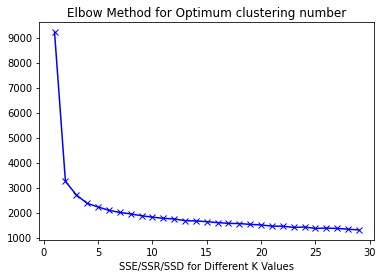

In [47]:
plt.plot(K, ssd, "bx-")
plt.xlabel("SSE/SSR/SSD for Different K Values")
plt.title("Elbow Method for Optimum clustering number")
plt.show(block=True)

In [48]:
# pip install yellowbrick

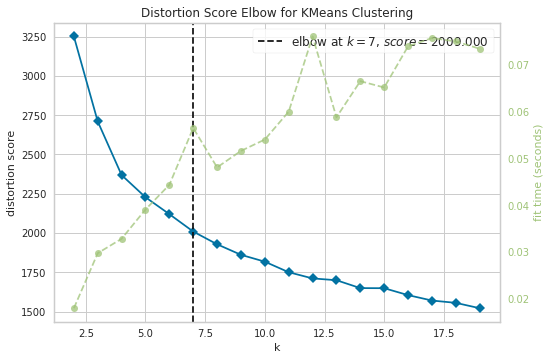

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(X)
elbow.show(block=True)

In [50]:
elbow.elbow_value_

7

**Final Clustering**

In [51]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(X)

In [52]:
print(kmeans.n_clusters)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.inertia_)

7
[[-0.03136078 -0.05613155  0.22575533  0.52040914  0.20464227  0.06304602
   0.174863   -0.03780662  0.69394683  0.51426007 -0.12624166  0.02459668
   0.26497438 -0.44631766  0.34308395  0.47554055  0.3276095   0.45945769
   0.55118162  0.62075808 -0.40133467  0.43179972  0.17774174  0.14891562
   0.1137697   0.17587075 -0.03295224 -0.02120184  0.01138181  0.23772466
   0.52966417 -0.01869759  0.37417179  0.3100208 ]
 [-1.92192038 -1.91718613 -1.72043671 -1.7284813  -1.51122285 -1.62265523
  -1.79876212 -1.52531785 -1.69180298 -1.78718941 -1.77466221 -1.43589606
  -1.44589946 -1.54739307 -1.40082188 -1.36754869 -1.35191861 -1.27612955
  -1.29454361 -1.35437278 -1.4276726  -1.19738685 -1.81401012 -1.72771361
  -1.99182453 -1.69465775 -1.72815799 -1.7573759  -1.56059322 -1.90087968
  -1.48727715 -1.38925765 -1.04804673 -1.5176758 ]
 [ 0.84933061  0.8708247   0.84609669  0.85295161  0.84563467  0.88215532
   0.84026672  0.85779313  0.76992436  0.79289468  0.86788536  0.7636281
   0.9113

In [53]:
clusters_kmeans = kmeans.labels_

In [54]:
new_X=X.copy()

In [55]:
new_X.shape

(271, 34)

In [56]:
new_X["cluster"] = clusters_kmeans
new_X.head()

,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426,cluster
0,-0.542606,-0.559398,-1.404764,-0.437916,-0.766602,-0.794802,-0.907351,-0.791605,-0.446324,-0.122619,-1.223858,-1.035633,-1.126240,-1.009285,-0.541797,-0.690375,-0.535091,-1.067288,-1.205671,-1.004927,-1.313773,-1.041775,-0.693269,-0.435633,0.012848,-1.281899,-1.132245,-0.494569,-1.234869,-1.519578,-0.142650,-1.487256,-0.955381,-0.252741,5
1,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,0.404075,0.727985,0.691171,0.459154,0.996474,0.631888,0.840464,0.911936,0.799406,0.588047,1.229965,0.749536,0.742305,0.878802,0.669953,0.847750,0.716763,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611,2
2,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,1.001915,0.727985,0.691171,1.132359,0.319105,0.631888,0.840464,0.911936,0.799406,0.588047,0.573607,0.749536,0.742305,0.878802,0.669953,0.077240,0.716763,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611,2
3,0.595327,1.307560,0.678677,0.682837,0.722639,1.481795,1.355461,1.001915,-0.054888,0.691171,0.459154,0.996474,1.335139,1.580363,0.185069,0.799406,0.588047,-0.082751,0.097800,0.043412,0.878802,1.354645,0.847750,0.716763,1.560314,0.813645,0.428479,0.631718,0.198319,0.768231,-0.142650,0.668713,-0.275832,-0.252741,6
4,0.595327,0.560776,1.373158,1.430006,0.722639,0.722929,0.601190,0.404075,2.293730,1.504961,0.459154,0.996474,0.631888,0.100564,0.185069,0.799406,1.336806,0.573607,0.749536,0.742305,0.252352,1.354645,0.077240,0.716763,0.786581,0.115130,0.428479,0.631718,0.198319,0.768231,1.874292,-0.049944,1.083267,1.041611,2


In [57]:
new_X.groupby(["cluster"]).agg(["median"])

,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.163295,-0.186007,-0.015803,0.682837,-0.021981,-0.035936,-0.153081,-0.193765,0.727985,0.691171,-0.214051,0.319105,0.631888,-0.639335,0.185069,0.799406,0.588047,0.573607,0.749536,0.742305,-0.374098,-0.014738,0.077240,-0.051501,0.012848,0.115130,-0.195810,-0.119140,0.198319,0.005628,0.529664,-0.049944,0.403717,0.394435
1,-1.680540,-1.679573,-1.752004,-1.558670,-1.511223,-1.553667,-1.661622,-1.389445,-1.620633,-1.750199,-1.560461,-1.713001,-1.477865,-1.379234,-1.632098,-1.435266,-1.658229,-1.395467,-1.205671,-1.354373,-1.626998,-1.384121,-1.849033,-1.588029,-2.308352,-1.980414,-1.756535,-1.620856,-1.951463,-2.282181,-1.487277,-1.487256,-0.955381,-1.547093
2,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,1.001915,0.727985,0.691171,1.132359,0.996474,0.631888,0.840464,0.911936,0.799406,0.588047,0.573607,0.749536,0.742305,0.878802,0.669953,0.847750,0.716763,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,1.083267,1.041611
3,-0.921918,-0.932790,-1.057524,-1.558670,-1.511223,-0.794802,-0.907351,-0.791605,-1.620633,-1.750199,-0.887256,-0.696948,-1.477865,-0.639335,-1.268664,-1.435266,-1.658229,-1.395467,-1.205671,-1.354373,-1.000548,-1.384121,-1.078524,-1.588029,-0.760885,-1.281899,-0.820100,-0.869998,-1.234869,-0.756975,-1.151120,-0.768600,-0.955381,-1.547093
4,-0.163295,-0.186007,-0.363043,-0.811501,-0.766602,-0.794802,-0.153081,-0.791605,-0.054888,-0.122619,-0.214051,-1.035633,-0.774614,0.100564,-0.541797,-0.690375,-0.722281,-1.231378,-1.205671,-0.655480,-0.374098,-1.041775,-0.693269,-0.051501,0.012848,-0.583384,-0.820100,-0.119140,-0.518275,-0.756975,-0.814963,-0.049944,-0.955381,-0.576329
5,-0.669044,-0.932790,-0.710283,-0.811501,-0.766602,-0.794802,-0.907351,-0.791605,-0.837760,-0.122619,-0.887256,-1.035633,-0.774614,-0.639335,-0.541797,0.054515,-0.909470,-0.739109,-0.553935,-0.655480,-1.000548,-0.699429,-0.693269,-0.819765,-0.760885,-1.281899,-0.820100,-0.869998,-0.876572,-0.756975,-0.142650,-1.487256,-0.955381,-0.252741
6,0.595327,0.560776,0.678677,-0.064332,0.722639,-0.035936,0.601190,1.001915,-0.054888,-0.122619,0.459154,0.996474,-0.071363,0.840464,-0.541797,-0.690375,0.588047,-0.082751,0.097800,0.043412,0.878802,-0.014738,0.847750,0.716763,0.786581,0.813645,0.428479,0.631718,0.914913,0.768231,-0.142650,1.387369,-0.275832,-0.252741


In [58]:
kmeans = KMeans(n_clusters=2).fit(X)
print(kmeans.n_clusters)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.inertia_)

2
[[-0.87477176 -0.9074754  -0.95943317 -0.95185906 -0.92751593 -0.918064
  -0.93611594 -0.90644434 -0.91073989 -0.892731   -0.90912547 -0.87585786
  -0.96234657 -0.84834596 -0.85903169 -0.87870222 -0.93062161 -0.88836585
  -0.91110087 -0.96840251 -0.86605557 -0.94119904 -0.92616313 -0.89029788
  -0.88874797 -0.96914601 -0.97617262 -0.91454048 -0.93426355 -0.95731991
  -0.86624154 -0.86401471 -0.97553706 -0.93373825]
 [ 0.67466057  0.69988299  0.739955    0.73411352  0.71533909  0.70804936
   0.72197177  0.69908779  0.7024007   0.68851149  0.70115559  0.67549822
   0.74220193  0.65427989  0.66252117  0.6776919   0.71773432  0.68514491
   0.7026791   0.74687252  0.66793828  0.72589207  0.71429575  0.68663497
   0.68543961  0.74744594  0.75286515  0.70533187  0.72054313  0.73832516
   0.66808171  0.66636429  0.75237498  0.720138  ]]
[0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 

In [59]:
clusters_kmeans = kmeans.labels_

In [60]:
new_X=X.copy()

In [61]:
new_X["cluster"] = clusters_kmeans
new_X.head()

,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426,cluster
0,-0.542606,-0.559398,-1.404764,-0.437916,-0.766602,-0.794802,-0.907351,-0.791605,-0.446324,-0.122619,-1.223858,-1.035633,-1.126240,-1.009285,-0.541797,-0.690375,-0.535091,-1.067288,-1.205671,-1.004927,-1.313773,-1.041775,-0.693269,-0.435633,0.012848,-1.281899,-1.132245,-0.494569,-1.234869,-1.519578,-0.142650,-1.487256,-0.955381,-0.252741,0
1,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,0.404075,0.727985,0.691171,0.459154,0.996474,0.631888,0.840464,0.911936,0.799406,0.588047,1.229965,0.749536,0.742305,0.878802,0.669953,0.847750,0.716763,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611,1
2,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,1.001915,0.727985,0.691171,1.132359,0.319105,0.631888,0.840464,0.911936,0.799406,0.588047,0.573607,0.749536,0.742305,0.878802,0.669953,0.077240,0.716763,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611,1
3,0.595327,1.307560,0.678677,0.682837,0.722639,1.481795,1.355461,1.001915,-0.054888,0.691171,0.459154,0.996474,1.335139,1.580363,0.185069,0.799406,0.588047,-0.082751,0.097800,0.043412,0.878802,1.354645,0.847750,0.716763,1.560314,0.813645,0.428479,0.631718,0.198319,0.768231,-0.142650,0.668713,-0.275832,-0.252741,1
4,0.595327,0.560776,1.373158,1.430006,0.722639,0.722929,0.601190,0.404075,2.293730,1.504961,0.459154,0.996474,0.631888,0.100564,0.185069,0.799406,1.336806,0.573607,0.749536,0.742305,0.252352,1.354645,0.077240,0.716763,0.786581,0.115130,0.428479,0.631718,0.198319,0.768231,1.874292,-0.049944,1.083267,1.041611,1


In [62]:
new_X.groupby(["cluster"]).agg(["median"])

,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.921918,-0.932790,-0.710283,-0.811501,-0.766602,-0.794802,-0.907351,-0.791605,-0.837760,-0.936409,-0.887256,-1.035633,-0.774614,-0.639335,-0.541797,-0.690375,-0.909470,-1.067288,-1.205671,-0.830203,-1.000548,-1.384121,-0.693269,-0.819765,-0.760885,-1.281899,-0.820100,-0.869998,-1.234869,-0.756975,-0.814963,-0.768600,-0.955381,-0.899917
1,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,1.001915,0.727985,0.691171,0.795756,0.996474,0.631888,0.840464,0.911936,0.799406,0.588047,0.573607,0.749536,0.742305,0.878802,0.669953,0.847750,0.716763,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,1.083267,1.041611


**Hierarchical Clustering**

In [63]:
from scipy.cluster.hierarchy import linkage
hc_average = linkage(X,"average")

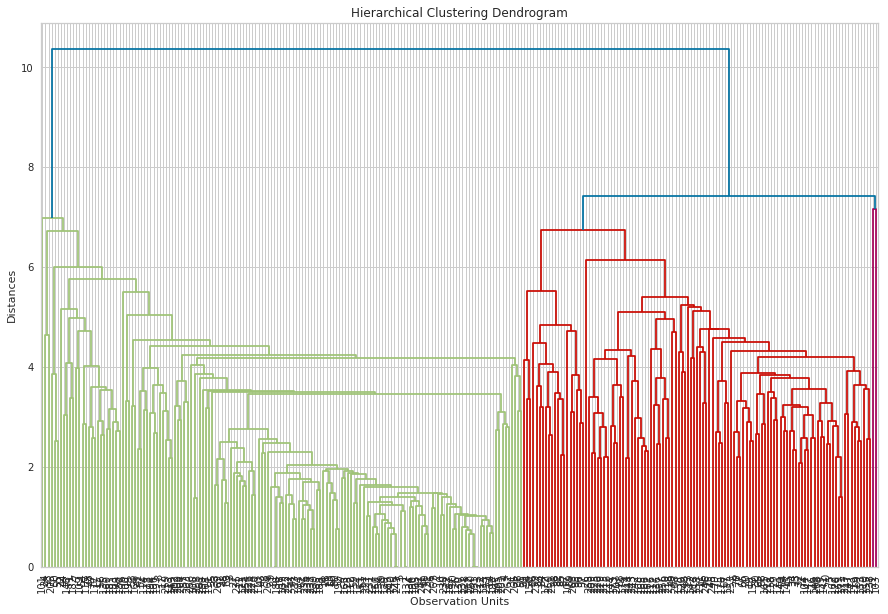

In [64]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(15, 10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observation Units")
plt.ylabel("Distances")
dendrogram(hc_average, leaf_font_size=10)
plt.show(block=True)

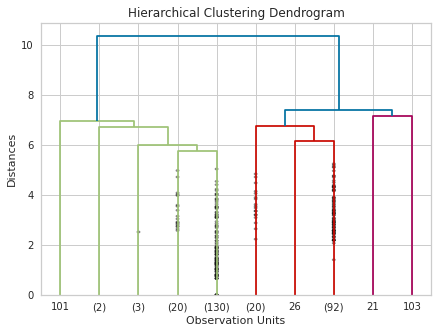

In [65]:
plt.figure(figsize=(7, 5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observation Units")
plt.ylabel("Distances")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show(block=True)

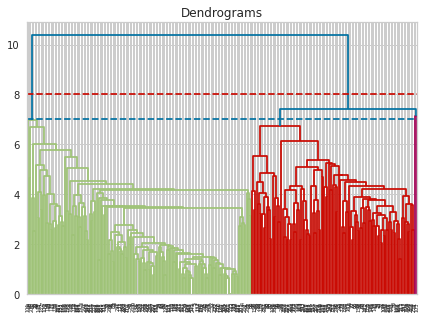

In [66]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=8, color='r', linestyle='--')
plt.axhline(y=7, color='b', linestyle='--')
plt.show(block=True)

In [67]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, linkage="average")
clusters = cluster.fit_predict(X)

In [68]:
new_X["hi_cluster_no"] = clusters

In [69]:
new_X.head()

,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426,cluster,hi_cluster_no
0,-0.542606,-0.559398,-1.404764,-0.437916,-0.766602,-0.794802,-0.907351,-0.791605,-0.446324,-0.122619,-1.223858,-1.035633,-1.126240,-1.009285,-0.541797,-0.690375,-0.535091,-1.067288,-1.205671,-1.004927,-1.313773,-1.041775,-0.693269,-0.435633,0.012848,-1.281899,-1.132245,-0.494569,-1.234869,-1.519578,-0.142650,-1.487256,-0.955381,-0.252741,0,0
1,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,0.404075,0.727985,0.691171,0.459154,0.996474,0.631888,0.840464,0.911936,0.799406,0.588047,1.229965,0.749536,0.742305,0.878802,0.669953,0.847750,0.716763,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611,1,1
2,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,1.001915,0.727985,0.691171,1.132359,0.319105,0.631888,0.840464,0.911936,0.799406,0.588047,0.573607,0.749536,0.742305,0.878802,0.669953,0.077240,0.716763,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611,1,1
3,0.595327,1.307560,0.678677,0.682837,0.722639,1.481795,1.355461,1.001915,-0.054888,0.691171,0.459154,0.996474,1.335139,1.580363,0.185069,0.799406,0.588047,-0.082751,0.097800,0.043412,0.878802,1.354645,0.847750,0.716763,1.560314,0.813645,0.428479,0.631718,0.198319,0.768231,-0.142650,0.668713,-0.275832,-0.252741,1,1
4,0.595327,0.560776,1.373158,1.430006,0.722639,0.722929,0.601190,0.404075,2.293730,1.504961,0.459154,0.996474,0.631888,0.100564,0.185069,0.799406,1.336806,0.573607,0.749536,0.742305,0.252352,1.354645,0.077240,0.716763,0.786581,0.115130,0.428479,0.631718,0.198319,0.768231,1.874292,-0.049944,1.083267,1.041611,1,1


In [70]:
new_X.groupby(["hi_cluster_no"]).agg(["median"])

,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426,cluster
,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median,median
hi_cluster_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.921918,-0.932790,-0.710283,-0.811501,-0.766602,-0.794802,-0.907351,-0.791605,-0.837760,-0.936409,-0.887256,-1.035633,-0.774614,-0.639335,-0.541797,-0.690375,-0.909470,-1.395467,-1.205671,-1.004927,-1.000548,-1.384121,-0.693269,-0.819765,-0.760885,-1.281899,-0.820100,-0.869998,-1.234869,-0.756975,-0.814963,-0.768600,-0.955381,-0.899917,0.0
1,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,1.001915,0.727985,0.691171,0.795756,0.996474,0.631888,0.840464,0.911936,0.799406,0.588047,0.573607,0.749536,0.742305,0.878802,0.669953,0.847750,0.716763,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,1.083267,1.041611,1.0


**Principal Component Analysis**

In [71]:
from sklearn.decomposition import PCA
pca = PCA()
pca_fit = pca.fit_transform(X)

In [72]:
pca.explained_variance_ratio_

array([0.77153394, 0.04850192, 0.02418373, 0.01702436, 0.01564024,
       0.01084304, 0.00975746, 0.00934532, 0.00832135, 0.00706108,
       0.00651262, 0.00599626, 0.00564192, 0.00550025, 0.00498368,
       0.00452737, 0.0041037 , 0.0038981 , 0.00353203, 0.00316496,
       0.00306954, 0.00303316, 0.00285812, 0.00267633, 0.00251955,
       0.00246448, 0.00208837, 0.00194364, 0.00185802, 0.00178096,
       0.00164373, 0.00156036, 0.00128615, 0.00114425])

In [73]:
np.cumsum(pca.explained_variance_ratio_)

array([0.77153394, 0.82003586, 0.84421959, 0.86124395, 0.87688419,
       0.88772722, 0.89748468, 0.90683   , 0.91515135, 0.92221243,
       0.92872505, 0.93472131, 0.94036323, 0.94586348, 0.95084716,
       0.95537453, 0.95947824, 0.96337634, 0.96690837, 0.97007333,
       0.97314287, 0.97617603, 0.97903415, 0.98171048, 0.98423003,
       0.98669451, 0.98878288, 0.99072652, 0.99258454, 0.9943655 ,
       0.99600923, 0.9975696 , 0.99885575, 1.        ])

**Optimum Component Number**

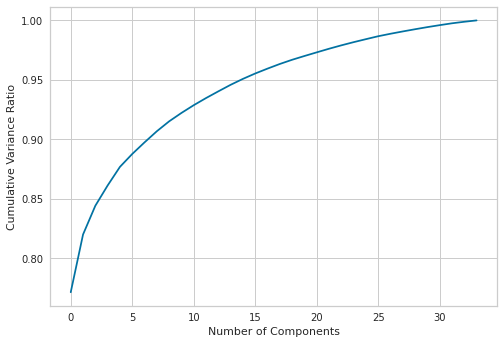

In [74]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Ratio")
plt.show(block=True)

In [75]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.77153394, 0.04850192])

In [76]:
np.cumsum(pca.explained_variance_ratio_)

array([0.77153394, 0.82003586])

In [77]:
y = new_X["cluster"]

In [78]:
import warnings

warnings.catch_warnings()
warnings.simplefilter("ignore")
    
from sklearn.model_selection import cross_validate    
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

def base_models(X, y, scoring):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   ('CatBoost', CatBoostClassifier(verbose=False))]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

scores = ["roc_auc", "f1", "precision", "recall", "accuracy"]

for i in scores:
    base_models(X, y, i)

Base Models....
roc_auc: 1.0 (LR) 
roc_auc: 1.0 (KNN) 
roc_auc: 1.0 (SVC) 
roc_auc: 0.9518 (CART) 
roc_auc: 0.9995 (RF) 
roc_auc: 0.995 (Adaboost) 
roc_auc: 0.9888 (GBM) 
roc_auc: 0.9984 (XGBoost) 
roc_auc: 0.9964 (LightGBM) 
roc_auc: 0.9997 (CatBoost) 
Base Models....
f1: 0.9968 (LR) 
f1: 1.0 (KNN) 
f1: 0.9968 (SVC) 
f1: 0.9674 (CART) 
f1: 0.9868 (RF) 
f1: 0.9628 (Adaboost) 
f1: 0.9599 (GBM) 
f1: 0.9804 (XGBoost) 
f1: 0.9603 (LightGBM) 
f1: 0.9968 (CatBoost) 
Base Models....
precision: 0.9936 (LR) 
precision: 1.0 (KNN) 
precision: 0.9936 (SVC) 
precision: 0.9525 (CART) 
precision: 0.9933 (RF) 
precision: 0.986 (Adaboost) 
precision: 0.9671 (GBM) 
precision: 0.9804 (XGBoost) 
precision: 0.9667 (LightGBM) 
precision: 0.9936 (CatBoost) 
Base Models....
recall: 1.0 (LR) 
recall: 1.0 (KNN) 
recall: 1.0 (SVC) 
recall: 0.9216 (CART) 
recall: 0.9935 (RF) 
recall: 0.9412 (Adaboost) 
recall: 0.9477 (GBM) 
recall: 0.9804 (XGBoost) 
recall: 0.9542 (LightGBM) 
recall: 1.0 (CatBoost) 
Base Models..

In [79]:
y = new_X["hi_cluster_no"]

In [80]:
for i in scores:
    base_models(X, y, i)

Base Models....
roc_auc: 1.0 (LR) 
roc_auc: 1.0 (KNN) 
roc_auc: 0.9997 (SVC) 
roc_auc: 0.9438 (CART) 
roc_auc: 0.9992 (RF) 
roc_auc: 0.997 (Adaboost) 
roc_auc: 0.9578 (GBM) 
roc_auc: 0.9967 (XGBoost) 
roc_auc: 0.9965 (LightGBM) 
roc_auc: 0.999 (CatBoost) 
Base Models....
f1: 0.9936 (LR) 
f1: 0.9935 (KNN) 
f1: 0.9935 (SVC) 
f1: 0.956 (CART) 
f1: 0.9936 (RF) 
f1: 0.9712 (Adaboost) 
f1: 0.9621 (GBM) 
f1: 0.9679 (XGBoost) 
f1: 0.9546 (LightGBM) 
f1: 0.9871 (CatBoost) 
Base Models....
precision: 0.9937 (LR) 
precision: 1.0 (KNN) 
precision: 1.0 (SVC) 
precision: 0.9442 (CART) 
precision: 0.9936 (RF) 
precision: 0.9685 (Adaboost) 
precision: 0.9442 (GBM) 
precision: 0.9681 (XGBoost) 
precision: 0.961 (LightGBM) 
precision: 0.9935 (CatBoost) 
Base Models....
recall: 0.9936 (LR) 
recall: 0.9872 (KNN) 
recall: 0.9872 (SVC) 
recall: 0.9679 (CART) 
recall: 0.9808 (RF) 
recall: 0.9744 (Adaboost) 
recall: 0.9744 (GBM) 
recall: 0.9679 (XGBoost) 
recall: 0.9487 (LightGBM) 
recall: 0.9808 (CatBoost) 


# TASK 10. Graphing Ordered Variables Importance Level By Using feature_importance Function.

In [81]:
def feature_importance(model, X_train, y_train):
    model.fit(X_train, y_train)
    feature_importance = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["importance"])
    feature_importance.sort_values(by="importance", ascending=False, inplace=True)
    plt.figure(figsize=(5, 5))
    sns.barplot(x=feature_importance.importance[0:5], y=feature_importance.index[0:5])
    plt.title("Feature Importance")
    plt.show()

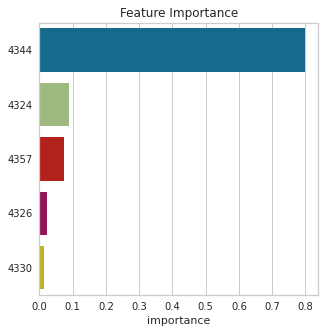

In [82]:
feature_importance(DecisionTreeClassifier(random_state=1), X, y)

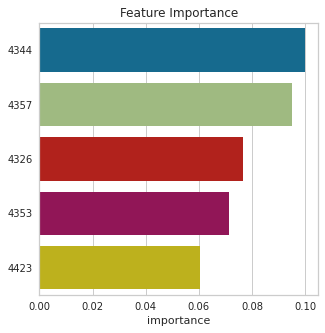

In [83]:
feature_importance(RandomForestClassifier(random_state=1), X, y)

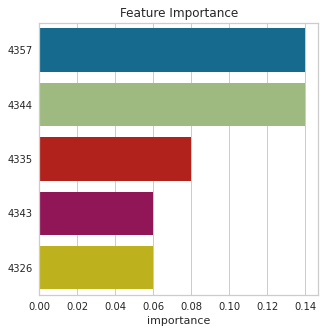

In [84]:
feature_importance(AdaBoostClassifier(random_state=1), X, y)

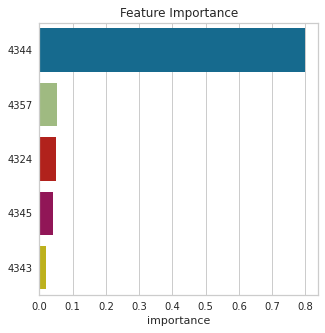

In [85]:
feature_importance(GradientBoostingClassifier(random_state=1), X, y)

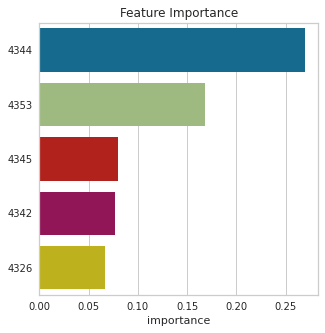

In [86]:
feature_importance(XGBClassifier(random_state=1), X, y)

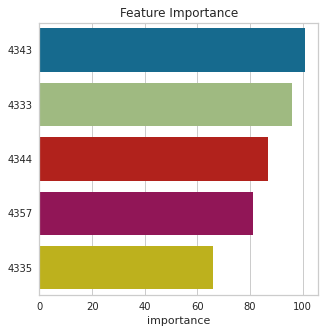

In [87]:
feature_importance(LGBMClassifier(random_state=1), X, y)